In [1]:
import pandas as pd
import numpy as np

In [2]:
m_df=pd.read_csv(r"C:\Users\pepsi\OneDrive\Desktop\My Folder\Codebasics\archive\Spotify Most Streamed Songs.csv")

In [3]:
m_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [4]:
m_df['streams']=m_df['streams'].replace({
'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3':280187548})

In [5]:
m_df['streams'].iloc[574]

280187548

In [6]:
m_df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [7]:
m_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [8]:
#EDA
m_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [9]:
m_df['in_shazam_charts']=m_df['in_shazam_charts'].fillna(50)

In [10]:
m_df['in_shazam_charts'].isnull().sum()

0

In [11]:
m_df['key']=m_df['key'].fillna(m_df['key'].mode()[0])

In [12]:
m_df['key'].isnull().sum()

0

How have the number of streams for popular songs changed over the years?

In [13]:
m_df['streams']=pd.to_numeric(m_df['streams'],errors='coerce')

In [14]:
m_df['streams'].isnull().sum()

0

In [15]:
m_df['streams']=m_df['streams'].apply(lambda x: x/1000000)

In [16]:
m_df['streams'].head()

0    141.381703
1    133.716286
2    140.003974
3    800.840817
4    303.236322
Name: streams, dtype: float64

In [17]:
yearly_streams=m_df.groupby('released_year')['streams'].sum().reset_index()

In [18]:
yearly_streams.tail()

,released_year,streams
45,2019,37870.932581
46,2020,34703.731857
47,2021,73808.103039
48,2022,116402.377962
49,2023,25808.484104


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

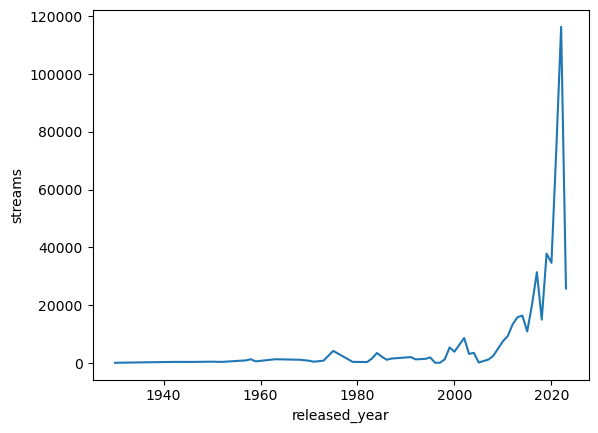

In [20]:
sns.lineplot(x='released_year',y='streams',data=yearly_streams)
plt.show()

In [21]:
m_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141.381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133.716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140.003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800.840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303.236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [22]:
released_songs_yearly=m_df.groupby('released_year')['track_name'].count().reset_index()

In [23]:
released_songs_yearly.head()

,released_year,track_name
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1


In [24]:
released_songs_yearly.tail()

,released_year,track_name
45,2019,36
46,2020,37
47,2021,119
48,2022,402
49,2023,175


In [25]:
m_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141.381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133.716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140.003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800.840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303.236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [26]:
#Most streamed songs for the year
most_streamed_yearly=m_df.groupby('released_year')['streams'].max().reset_index()

In [27]:
most_streamed_yearly.tail()

,released_year,streams
45,2019,3703.895074
46,2020,2557.975762
47,2021,2665.343922
48,2022,2513.188493
49,2023,1316.855716


In [28]:
#joining both the m_df and most_streamed songs
most_streamed_songs=most_streamed_yearly.merge(m_df[['released_year','streams','track_name','artist(s)_name']],on=['released_year','streams'],
                                               how='left')

In [29]:
most_streamed_songs.tail()

,released_year,streams,track_name,artist(s)_name
45,2019,3703.895074,Blinding Lights,The Weeknd
46,2020,2557.975762,Heat Waves,Glass Animals
47,2021,2665.343922,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi"
48,2022,2513.188493,As It Was,Harry Styles
49,2023,1316.855716,Flowers,Miley Cyrus


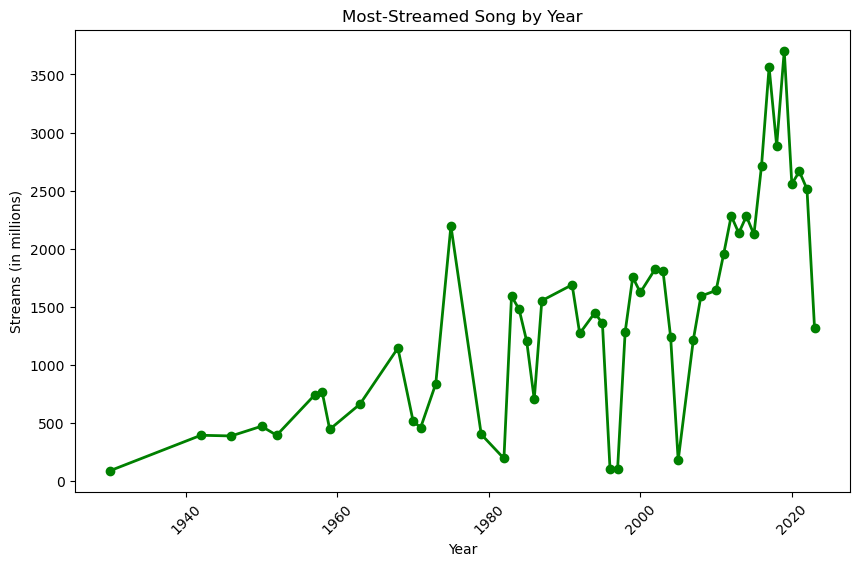

In [30]:
import matplotlib.pyplot as plt

# Plotting streams of the most-streamed song by year
plt.figure(figsize=(10, 6))
plt.plot(most_streamed_songs['released_year'], most_streamed_songs['streams'], marker='o', color='g', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Streams (in millions)')
plt.title('Most-Streamed Song by Year')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [31]:
#Are there any noticeable trends in the number of songs in Spotify, Apple, Deezer, and Shazam charts over time?

In [32]:
charts=m_df[['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts','track_name','released_year']]

In [33]:
charts

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts,track_name,released_year
0,147,263,10,826,Seven (feat. Latto) (Explicit Ver.),2023
1,48,126,14,382,LALA,2023
2,113,207,14,949,vampire,2023
3,100,207,12,548,Cruel Summer,2019
4,50,133,15,425,WHERE SHE GOES,2023
...,...,...,...,...,...,...
948,0,13,1,0,My Mind & Me,2022
949,0,0,0,0,Bigger Than The Whole Sky,2022
950,0,0,0,0,A Veces (feat. Feid),2022
951,0,26,0,0,En La De Ella,2022


In [34]:
charts['in_spotify_charts'].sum()

11445

In [35]:
charts['in_apple_charts'].sum()

49469

In [36]:
charts['in_deezer_charts'].sum()

2541

In [42]:
#Which artists have consistently appeared in the Spotify charts, and how has their presence changed over time?

In [47]:
artists_performance=m_df.groupby(['artist(s)_name','released_year'])['track_name'].count().reset_index()

In [48]:
artists_performance

,artist(s)_name,released_year,track_name
0,(G)I-DLE,2022,1
1,(G)I-DLE,2023,1
2,"21 Savage, Gunna",2022,1
3,"24kgoldn, Iann Dior",2020,1
4,50 Cent,2002,1
...,...,...,...
750,j-hope,2022,1
751,"j-hope, J. Cole",2023,1
752,sped up 8282,1997,1
753,"sped up nightcore, ARIZONATEARS, Lil Uzi Vert",2023,1


In [50]:
m_ddf=m_df.assign(artist=m_df['artist(s)_name'].str.split(',')).explode('artist')

In [51]:
m_ddf

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,artist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141.381703,43,...,Major,80,89,83,31,0,8,4,Not Found,Latto
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141.381703,43,...,Major,80,89,83,31,0,8,4,Not Found,Jung Kook
1,LALA,Myke Towers,1,2023,3,23,1474,48,133.716286,48,...,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,Myke Towers
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140.003974,94,...,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,Olivia Rodrigo
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800.840817,116,...,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,Taylor Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73.513683,2,...,Major,80,81,67,4,0,8,6,Not Found,Paulo Londra
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133.895612,29,...,Major,82,67,77,8,0,12,5,Not Found,Feid
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133.895612,29,...,Major,82,67,77,8,0,12,5,Not Found,Sech
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133.895612,29,...,Major,82,67,77,8,0,12,5,Not Found,Jhayco


In [52]:
artists_performance=m_ddf.groupby(['artist(s)_name','released_year'])['track_name'].count().reset_index()

In [53]:
artists_performance

,artist(s)_name,released_year,track_name
0,(G)I-DLE,2022,1
1,(G)I-DLE,2023,1
2,"21 Savage, Gunna",2022,2
3,"24kgoldn, Iann Dior",2020,2
4,50 Cent,2002,1
...,...,...,...
750,j-hope,2022,1
751,"j-hope, J. Cole",2023,2
752,sped up 8282,1997,1
753,"sped up nightcore, ARIZONATEARS, Lil Uzi Vert",2023,3


In [54]:
m_df['artist_count'] = m_df['artist(s)_name'].str.split(', ').apply(len)


In [55]:
artist_count_streams = m_df.groupby('artist_count')['streams'].mean().reset_index()


In [56]:
artist_count_streams

,artist_count,streams
0,1,567.720991
1,2,462.480786
2,3,381.342098
3,4,306.106246
4,5,144.808200
5,6,126.949882
6,7,432.719968
7,8,173.221173


In [60]:
artist_count_8 = m_df[m_df['artist_count'] == 8]

In [61]:
artist_count_8

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123.122413,22,...,C#,Major,81,63,68,11,0,11,4,Not Found
642,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",8,2021,8,12,1560,0,223.319934,72,...,G,Minor,56,61,76,10,0,14,11,Not Found


In [62]:
 #•	How do song characteristics (like BPM, danceability, energy, etc.) vary over time?

In [65]:
m_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141.381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133.716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140.003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800.840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303.236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [69]:
#BPM change over years
m_df['bpm']

0      125
1       92
2      138
3      170
4      144
      ... 
948    144
949    166
950     92
951     97
952     90
Name: bpm, Length: 953, dtype: int64

In [70]:
bpm_change_over_year=m_df.groupby('released_year')['bpm'].mean().reset_index()

In [71]:
bpm_change_over_year

,released_year,bpm
0,1930,130.000000
1,1942,96.000000
2,1946,139.000000
3,1950,143.000000
4,1952,140.000000
5,1957,147.000000
6,1958,135.000000
7,1959,120.500000
8,1963,140.000000
9,1968,116.000000


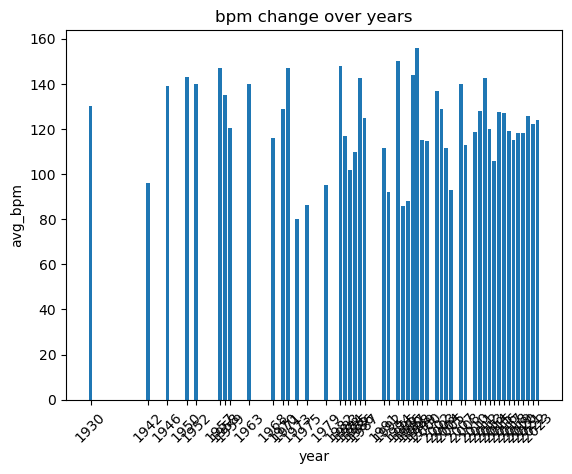

In [78]:
#barchar for visualization
plt.bar(x=bpm_change_over_year['released_year'],height=bpm_change_over_year['bpm'])
plt.title('bpm change over years')
plt.xlabel('year')
plt.ylabel('avg_bpm')
plt.xticks(ticks=bpm_change_over_year['released_year'], rotation=45)
plt.show()

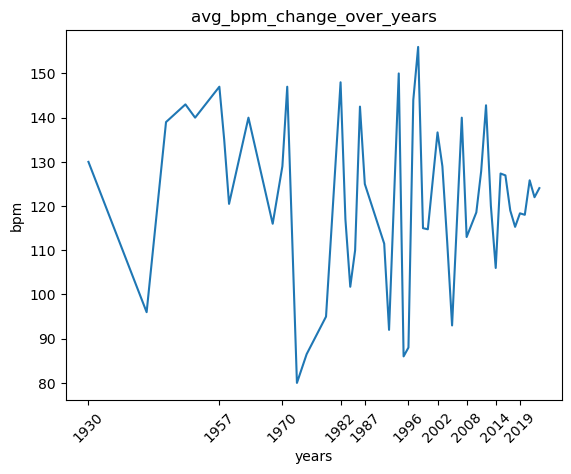

In [82]:
plt.plot(bpm_change_over_year['released_year'],bpm_change_over_year['bpm'])
plt.title('avg_bpm_change_over_years')
plt.xlabel('years')
plt.ylabel('bpm')
plt.xticks(ticks=bpm_change_over_year['released_year'][::5],rotation=45)
plt.show()

In [83]:
#danceability_over_years
dancebility=m_df.groupby('released_year')['danceability_%'].mean().reset_index()

In [84]:
dancebility

,released_year,danceability_%
0,1930,65.000000
1,1942,23.000000
2,1946,36.000000
3,1950,60.000000
4,1952,67.000000
5,1957,62.500000
6,1958,70.666667
7,1959,57.000000
8,1963,37.000000
9,1968,74.000000


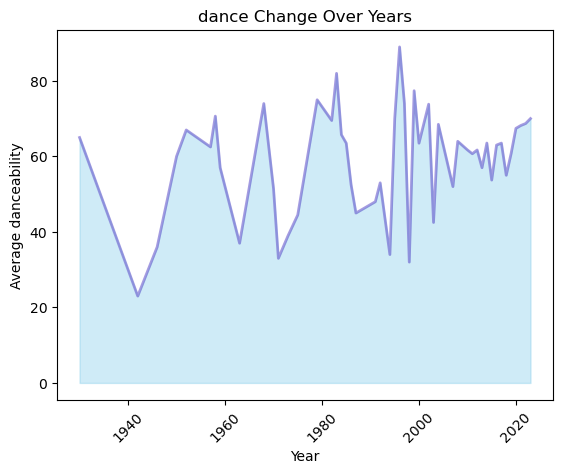

In [85]:
# Area chart for BPM change
plt.fill_between(dancebility['released_year'], dancebility['danceability_%'], color="skyblue", alpha=0.4)
plt.plot(dancebility['released_year'], dancebility['danceability_%'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('dance Change Over Years')
plt.xlabel('Year')
plt.ylabel('Average danceability')
plt.xticks(rotation=45)

plt.show()


In [95]:
#Energy
energy=m_df.groupby('released_year')['energy_%'].mean().reset_index()

In [96]:
energy

,released_year,energy_%
0,1930,80.000000
1,1942,25.000000
2,1946,15.000000
3,1950,32.000000
4,1952,36.000000
5,1957,35.500000
6,1958,48.000000
7,1959,30.000000
8,1963,71.000000
9,1968,70.000000


In [97]:
#•	What months or years have seen the highest number of new song releases on Spotify?

In [101]:
highest_song_releases_year=m_df.groupby(['released_year','released_month'])['track_name'].count().reset_index()

In [102]:
highest_song_releases_year

,released_year,released_month,track_name
0,1930,1,1
1,1942,1,1
2,1946,11,1
3,1950,1,1
4,1952,1,1
...,...,...,...
157,2023,3,37
158,2023,4,21
159,2023,5,29
160,2023,6,32


In [110]:
sorted_highest_release=highest_song_releases_year.sort_values(by='track_name',ascending=False)

In [111]:
sorted_highest_release

,released_year,released_month,track_name
147,2022,5,75
154,2022,12,48
143,2022,1,37
157,2023,3,37
152,2022,10,37
...,...,...,...
47,2003,3,1
46,2002,8,1
43,2000,11,1
42,2000,10,1


In [112]:
#in 5th month 2022 what is the stream count


In [116]:
stream_2020_5=m_df[(m_df['released_year']==2022)&(m_df['released_month']==5)].groupby(['released_year','released_month'])['streams'].sum().reset_index()

In [117]:
stream_2020_5

,released_year,released_month,streams
0,2022,5,24605.957716


In [118]:
monthly_streams = m_df.groupby(['released_year', 'released_month'])['streams'].sum().reset_index()


In [119]:
monthly_streams

,released_year,released_month,streams
0,1930,1,90.598517
1,1942,1,395.591396
2,1946,11,389.771964
3,1950,1,473.248298
4,1952,1,395.591396
...,...,...,...
157,2023,3,6293.413679
158,2023,4,3166.914154
159,2023,5,2738.201645
160,2023,6,2246.408110


In [120]:
chart_appearance = m_df.groupby(['released_year', 'released_month'])['in_spotify_charts'].sum().reset_index()


In [121]:
chart_appearance

,released_year,released_month,in_spotify_charts
0,1930,1,0
1,1942,1,0
2,1946,11,0
3,1950,1,0
4,1952,1,0
...,...,...,...
157,2023,3,697
158,2023,4,422
159,2023,5,614
160,2023,6,916


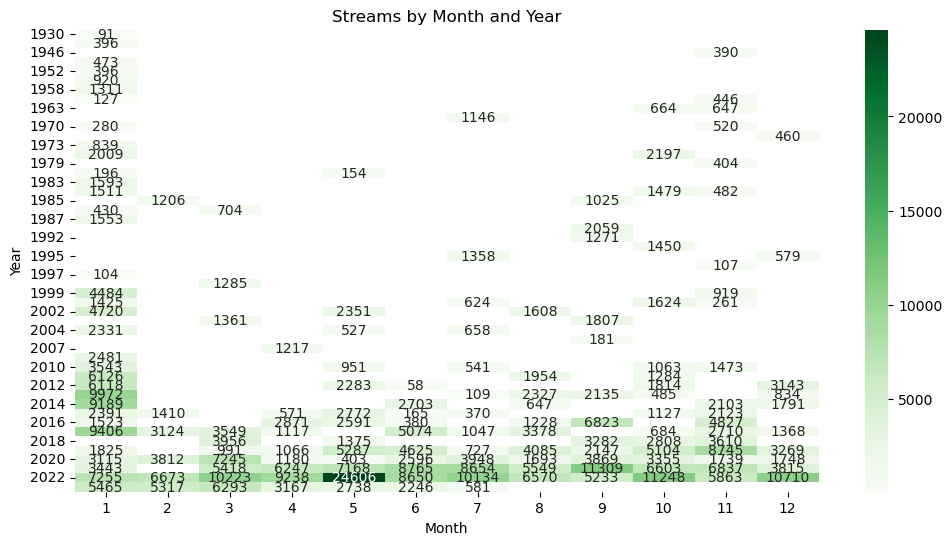

In [125]:
import seaborn as sns

# Create the pivot table for the heatmap
monthly_streams_pivot = monthly_streams.pivot(index='released_year', columns='released_month', values='streams')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_streams_pivot, cmap="Greens", annot=True, fmt=".0f")
plt.title('Streams by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


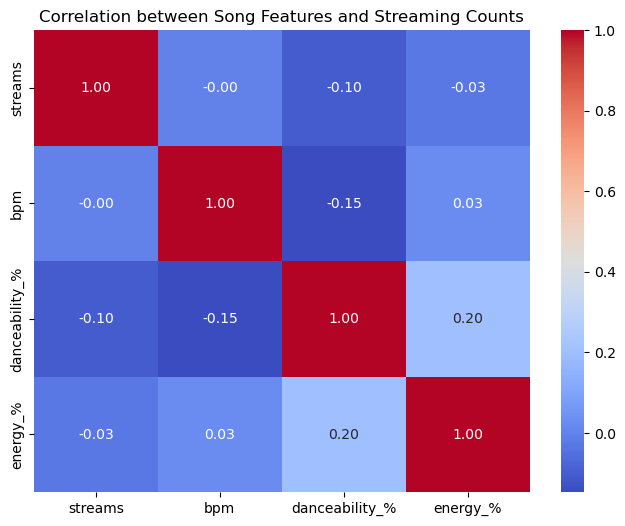

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
correlation_data = m_df[['streams', 'bpm', 'danceability_%', 'energy_%']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Song Features and Streaming Counts")
plt.show()
